# Question 1

In [1]:


import os
import json
import datetime
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

tweet_data = ['tweets_#gohawks.txt','tweets_#gopatriots.txt','tweets_#nfl.txt','tweets_#patriots.txt','tweets_#sb49.txt','tweets_#superbowl.txt']

#tweet_data = ['tweets_#nfl.txt']

#Keep the data in folder twitter_data under the same directory as this .pynb file
rel_path = "twitter_data/"
nfl_tweet_history = []
superbowl_tweet_history = []

for i in tweet_data:
    number_tweets = 0
    number_retweets = 0
    number_followers = 0
    x = 0
    
    text = open(rel_path+i,'rt',encoding='UTF-8')
    
    print(i + " has been opened")
    for line in text:
        json_object = json.loads(line)
        number_tweets = number_tweets + 1
        number_followers = number_followers + json_object['tweet']['user']['followers_count']
        number_retweets = number_retweets + json_object['metrics']['citations']['total']
        t = json_object['firstpost_date']
        
        if(number_tweets == 1):
            t_initial = json_object['firstpost_date']
            t_last = t_initial
        
        if(t> (t_last + 3600)):
            while(t> (t_last + 3600)):
                if(i == 'tweets_#nfl.txt'):
                    nfl_tweet_history.append(x)
                if(i == 'tweets_#superbowl.txt'):
                    superbowl_tweet_history.append(x)
                x = 0
                t_last = t_last + 3600
        if(t< (t_last+ 3600)):
            x = x + 1
    if(i == 'tweets_#nfl.txt'):
        nfl_tweet_history.append(x)
    if(i == 'tweets_#superbowl.txt'):
        superbowl_tweet_history.append(x)
        
    t_final = json_object['firstpost_date']
    number_hours = float(t_final - t_initial)/3600
   
    print('\n')
    print('Avg tweets/hour: ',  round(float(number_tweets/number_hours),3))
    print('\n')
    print ('Avg retweets/tweet: ', round(float(number_retweets)/float(number_tweets),3))
    print ('\n')
    print ('Avg num. of followers: ', round(float(number_followers)/float(number_tweets),3))
    print ('\n')
    
    #print(len(nfl_tweet_history))
        
    


tweets_#gohawks.txt has been opened


Avg tweets/hour:  193.545


Avg retweets/tweet:  2.015


Avg num. of followers:  2393.582


tweets_#gopatriots.txt has been opened


Avg tweets/hour:  38.385


Avg retweets/tweet:  1.4


Avg num. of followers:  1602.01


tweets_#nfl.txt has been opened


Avg tweets/hour:  279.551


Avg retweets/tweet:  1.539


Avg num. of followers:  4763.326


tweets_#patriots.txt has been opened


Avg tweets/hour:  499.421


Avg retweets/tweet:  1.783


Avg num. of followers:  3641.688


tweets_#sb49.txt has been opened


Avg tweets/hour:  1419.888


Avg retweets/tweet:  2.511


Avg num. of followers:  10230.045


tweets_#superbowl.txt has been opened


Avg tweets/hour:  1401.246


Avg retweets/tweet:  2.388


Avg num. of followers:  9958.116




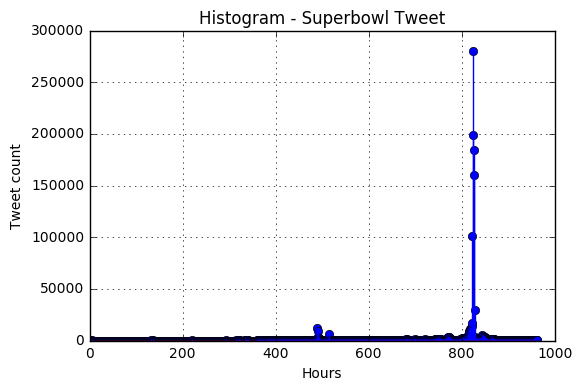

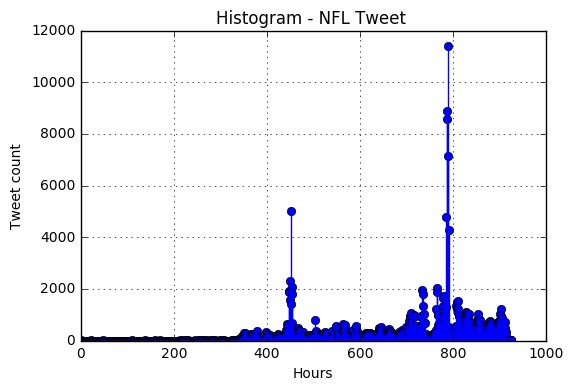

In [35]:
superbowl_tweet_hist = np.asarray(superbowl_tweet_history)
x_axis = range(len(superbowl_tweet_history))
plt.stem(x_axis, superbowl_tweet_history)
plt.xlabel('Hours')
plt.ylabel('Tweet count')
plt.title('Histogram - Superbowl Tweet')
plt.grid(True)
plt.show()

nfl_tweet_hist = np.asarray(nfl_tweet_history)
x_axis = range(len(nfl_tweet_history))
#print nfl_tweet_history
plt.stem(x_axis, nfl_tweet_hist)
plt.xlabel('Hours')
plt.ylabel('Tweet count')
plt.title('Histogram - NFL Tweet ')
plt.grid(True)
plt.show()